In [2]:
import pandas as pd
from collections import defaultdict

df = pd.read_csv(
    "desensitized_data/Desensitized_data_from_597_participants.csv",
    dtype=str  # Set all columns to string type when reading the CSV
)

# Create a dictionary to store columns with the same base name
column_groups = defaultdict(list)

for col in df.columns:
    base_name = col.split(".")[0]  # Remove any duplicated suffix (e.g., ".1", ".2")
    column_groups[base_name].append(col)

# Create a new DataFrame with merged data
df_merged = pd.DataFrame()

for base_name, col_variants in column_groups.items():
    # If there's only one column, just copy it
    if len(col_variants) == 1:
        df_merged[base_name] = df[col_variants[0]]
    else:
        # Merge multiple columns by taking the first non-null value
        df_merged[base_name] = df[col_variants].bfill(axis=1).iloc[:, 0]

df = df_merged.copy()
df_merged

,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,User Language,Q_RecaptchaScore,...,"Ability to respond quickly to control signals, and to apply great force smoothly and precisely","Ability to perform repetitive, routine tasks",Ability to reason inductively,Ability to detect small amounts of visual or acoustic energy,Ability to perceive patterns of light or sound,Ability to store very large amounts of information for long periods and to recall relevant facts at the appropriate time,Ability to store information briefly and then to erase it completely,"Ability to reason deductively, including computational ability",Please provide any suggestions or comments on the survey,Group
0,2/12/2025 22:24,2/12/2025 22:32,IP Address,100,510,True,2/12/2025 22:32,R_3eqq7Gofo6sZ3Tk,EN,1,...,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,But it all depends on human programming.,3
1,2/12/2025 22:31,2/12/2025 22:35,IP Address,100,228,True,2/12/2025 22:35,R_5J8uHvrhM4sRIjL,EN,1,...,Machines surpass humans,Machines surpass humans,Humans surpass machines,Humans surpass machines,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,NaN,2
2,2/12/2025 22:29,2/12/2025 22:35,IP Address,100,363,True,2/12/2025 22:35,R_6OGEs9Jk37UWjM2,EN,1,...,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,NaN,1
3,2/12/2025 22:27,2/12/2025 22:36,IP Address,100,485,True,2/12/2025 22:36,R_7EbCXnJ4ZDFVQc9,EN,1,...,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,No issues with this survey! Thank you,2
4,2/12/2025 22:27,2/12/2025 22:36,IP Address,100,516,True,2/12/2025 22:36,R_8FWlrwL9VWbkqlK,EN,1,...,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2/13/2025 0:00,2/13/2025 0:06,IP Address,100,367,True,2/13/2025 0:06,R_8cUBTXrjeEqbwfD,EN,1,...,Machines surpass humans,Humans surpass machines,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,Everything worked well and the instructions we...,2
593,2/13/2025 0:01,2/13/2025 0:09,IP Address,100,488,True,2/13/2025 0:09,R_8Hk1ZYuWBC6z3dF,EN,1,...,Humans surpass machines,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,NaN,2
594,2/13/2025 0:07,2/13/2025 0:12,IP Address,100,314,True,2/13/2025 0:12,R_3D0NwWA1A4pE3tL,EN,1,...,Machines surpass humans,Machines surpass humans,Humans surpass machines,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,NaN,1
595,2/13/2025 0:16,2/13/2025 0:31,IP Address,100,867,True,2/13/2025 0:31,R_2ozlRcIZoDwzO38,EN,1,...,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,No comment,2


In [3]:
df_merged["How do you describe yourself?"].value_counts(normalize=True)

How do you describe yourself?
Female                     0.505863
Male                       0.479062
Other                      0.013400
I prefer not to respond    0.001675
Name: proportion, dtype: float64

In [4]:
# Check if there is a column indicating the group
df.columns = df.columns.astype(str)  # Ensure all column names are strings
# Segment the data based on the scenario group
scenario_groups = {
    "Robotics Education": df[df["Group"] == "1"],
    "Chess Coach": df[df["Group"] == "2"],
    "Home Entertainment": df[df["Group"] == "3"],
}

In [5]:
# Identify acceptance-related questions
acceptance_questions = {
    "Robotics Education": "Do you think this robot could be used in schools to explain to students how a robot works?",
    "Chess Coach": "Do you think this robot could be used in schools to teach students chess?",
    "Home Entertainment": "Do you think this robot could be used at home to provide entertainment?",
}

acceptance_levels = [
    "Definitely yes",
    "Probably yes",
    "Neutral",
    "Probably not",
    "Definitely not",
]
scenario_labels = list(acceptance_questions.keys())
acceptance_data = {
    scenario: scenario_groups[scenario][question].value_counts(normalize=True)
    for scenario, question in acceptance_questions.items()
}

# Create a DataFrame to store the proportions of each level of acceptance
acceptance_df = pd.DataFrame(acceptance_data).fillna(0).reindex(acceptance_levels)

In [6]:
print(f'Propotion of answers to the Q1:')
acceptance_data

Propotion of answers to the Q1:


{'Robotics Education': Do you think this robot could be used in schools to explain to students how a robot works?
 Probably yes      0.528205
 Definitely yes    0.287179
 Probably not      0.092308
 Neutral           0.066667
 Definitely not    0.025641
 Name: proportion, dtype: float64,
 'Chess Coach': Do you think this robot could be used in schools to teach students chess?
 Probably yes               0.488152
 Definitely yes             0.260664
 Probably not               0.156398
 Neutral                    0.071090
 Definitely not             0.018957
 I prefer not to respond    0.004739
 Name: proportion, dtype: float64,
 'Home Entertainment': Do you think this robot could be used at home to provide entertainment?
 Probably yes      0.554974
 Probably not      0.188482
 Definitely yes    0.146597
 Neutral           0.073298
 Definitely not    0.036649
 Name: proportion, dtype: float64}

In [7]:
# Identify acceptance-related questions
replacement_human_question = "Would you welcome a future where robots that can talk, equipped with artificial intelligence (such as improved versions of ChatGPT), replace human workers?"
replacement_human_questions = {
    "Robotics Education": replacement_human_question,
    "Chess Coach": replacement_human_question,
    "Home Entertainment": replacement_human_question,
}

answers = [
    "Definitely yes",
    "Probably yes",
    "Neutral",
    "Probably not",
    "Definitely not",
]
scenario_labels = list(replacement_human_questions.keys())
answer_data = {
    scenario: scenario_groups[scenario][question].value_counts(normalize=True)
    for scenario, question in replacement_human_questions.items()
}

# Create a DataFrame to store the proportions of answers of the replacement_human question
replacement_human_df = pd.DataFrame(answer_data).fillna(0).reindex(answers)

In [8]:
print(f'Propotion of answers to the Q5:')
answer_data

Propotion of answers to the Q5:


{'Robotics Education': Would you welcome a future where robots that can talk, equipped with artificial intelligence (such as improved versions of ChatGPT), replace human workers?
 Probably yes      0.287179
 Probably not      0.235897
 Neutral           0.205128
 Definitely not    0.148718
 Definitely yes    0.123077
 Name: proportion, dtype: float64,
 'Chess Coach': Would you welcome a future where robots that can talk, equipped with artificial intelligence (such as improved versions of ChatGPT), replace human workers?
 Neutral           0.265403
 Probably not      0.236967
 Probably yes      0.203791
 Definitely not    0.161137
 Definitely yes    0.132701
 Name: proportion, dtype: float64,
 'Home Entertainment': Would you welcome a future where robots that can talk, equipped with artificial intelligence (such as improved versions of ChatGPT), replace human workers?
 Probably yes      0.235602
 Neutral           0.225131
 Probably not      0.219895
 Definitely not    0.198953
 Definit

In [9]:
# Count the number of people who chose "I prefer not to respond"
for s, q in acceptance_questions.items():
    count_prefer_not_to_respond = scenario_groups[s][
        scenario_groups[s][q] == "I prefer not to respond"
    ].shape[0]
    print(f"{s}: {count_prefer_not_to_respond} respondents preferred not to respond.")

count_prefer_not_to_respond = df[
    df[replacement_human_question] == "I prefer not to respond"
].shape[0]
print(f"A/B/C: {count_prefer_not_to_respond} respondents preferred not to respond.")

Robotics Education: 0 respondents preferred not to respond.
Chess Coach: 1 respondents preferred not to respond.
Home Entertainment: 0 respondents preferred not to respond.
A/B/C: 0 respondents preferred not to respond.


In [10]:
combined_df = pd.read_csv("desensitized_data/Q7_annotated_three_scenarios_llms+human.csv")

# Define categories and scenario labels for consistent indexing and plotting order
categories = ["positive", "neutral", "negative"]
scenario_labels = ["Robotics Education", "Chess Coach", "Home Entertainment"]
group_id_mapping = {
    "Robotics Education": 1,
    "Chess Coach": 2,
    "Home Entertainment": 3,
}

# Calculate the proportion of each category within each scenario
category_proportions = {}
for scenario in scenario_labels:
    scenario_data = combined_df[combined_df["Group"] == group_id_mapping[scenario]]
    category_counts = (
        scenario_data["Category_Final"]
        .value_counts(normalize=True)
        .reindex(categories)
        .fillna(0)
    )
    category_proportions[scenario] = category_counts

# Create a DataFrame to store the proportions, reindex to ensure categories order
opinion_df = pd.DataFrame(category_proportions).reindex(categories)
print(f'Propotion of classified opinions to the Q4:')
opinion_df

Propotion of classified opinions to the Q4:


,Robotics Education,Chess Coach,Home Entertainment
Category_Final,,,
positive,0.405128,0.454976,0.214660
neutral,0.292308,0.236967,0.214660
negative,0.302564,0.308057,0.570681


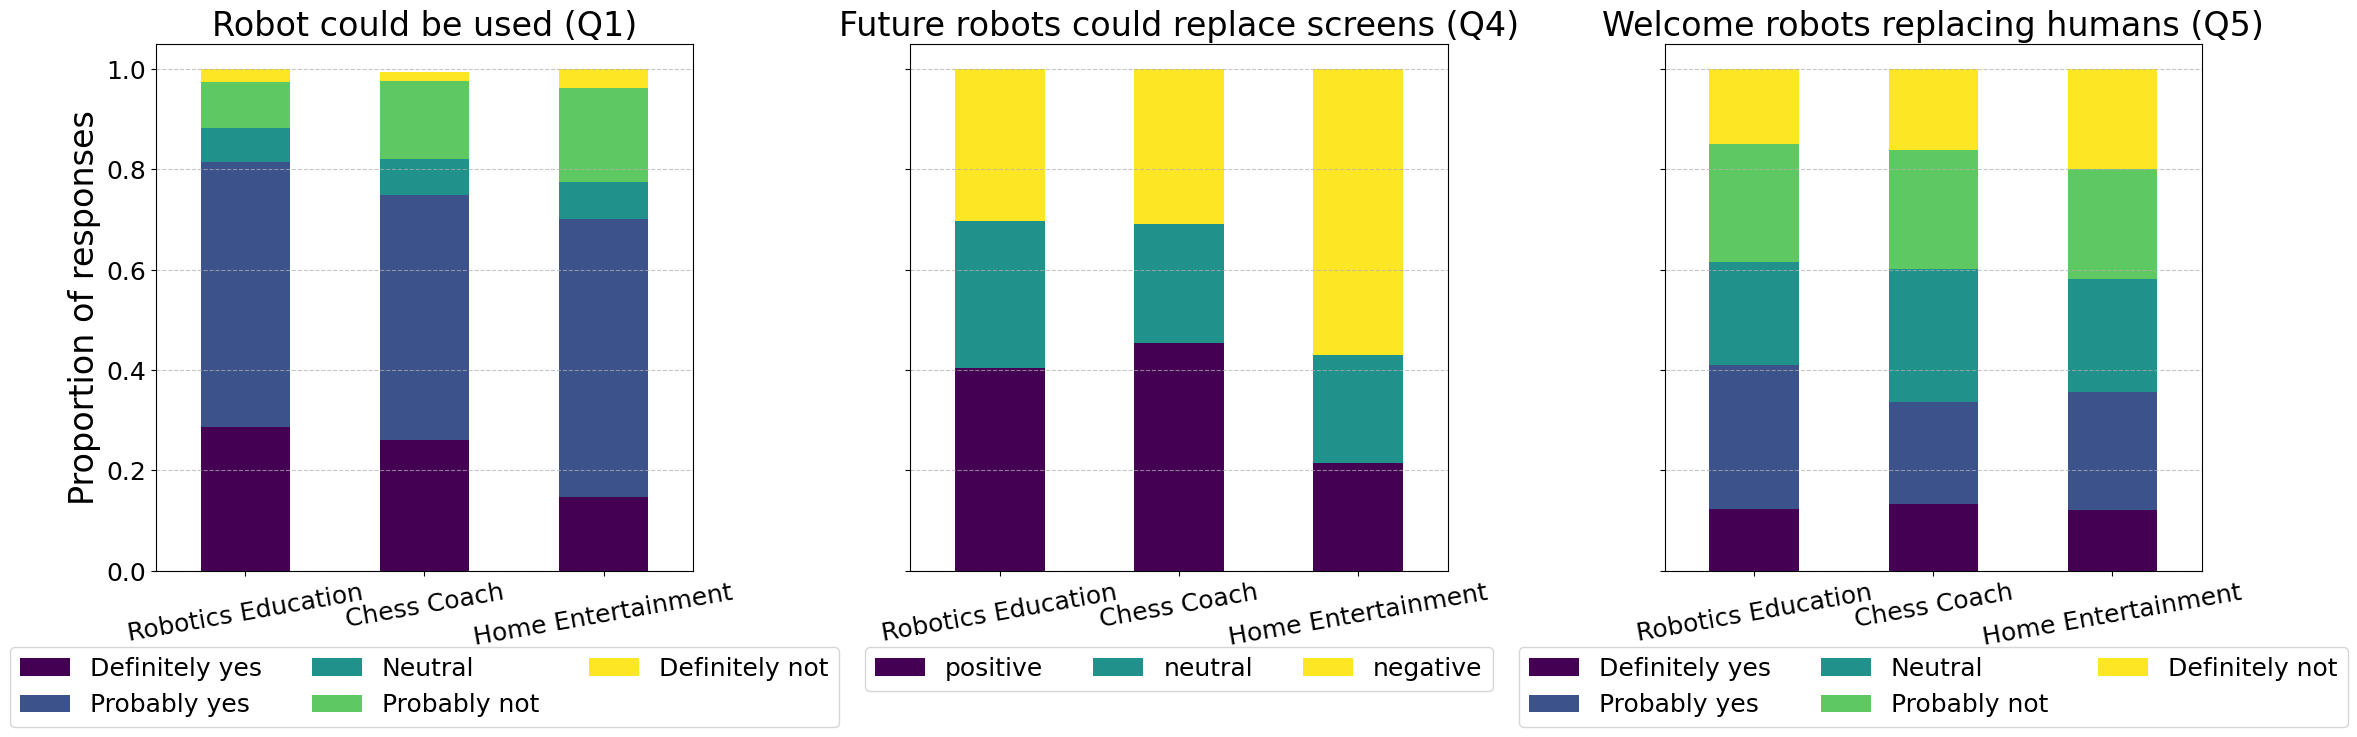

In [15]:
import matplotlib.pyplot as plt

# Set larger font sizes
plt.rcParams.update(
    {
        "font.size": 24,
        "axes.titlesize": 24,
        "axes.labelsize": 24,
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.fontsize": 18,
    }
)

# Prepare data for stacked bar chart for acceptance levels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

# Plot stacked bar chart for acceptance levels
acceptance_df.T.plot(kind="bar", stacked=True, ax=ax1, cmap="viridis", legend=False)
ax1.set_title("Robot could be used (Q1)")
# ax1.set_xlabel("Scenarios")
ax1.set_ylabel("Proportion of responses")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=10)
ax1.grid(axis="y", linestyle="--", alpha=0.7)
ax1.legend(bbox_to_anchor=(0.5, -0.12), loc="upper center", ncol=3)
# ax1.text(-0.02, 1.05, "A", transform=ax1.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")

# Plotting the attitude distribution
opinion_df.T.plot(kind="bar", stacked=True, ax=ax2, cmap="viridis", legend=True)
ax2.set_title("Future robots could replace screens (Q4)")
# ax2.set_xlabel('Attitude Category')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=10)
ax2.grid(axis="y", linestyle="--", alpha=0.7)
ax2.legend(bbox_to_anchor=(0.5, -0.12), loc="upper center", ncol=3)
# ax2.text(-0.02, 1.05, "B", transform=ax2.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")

# Plot stacked bar chart for replacement human question
replacement_human_df.T.plot(
    kind="bar", stacked=True, ax=ax3, cmap="viridis", legend=False
)
ax3.set_title("Welcome robots replacing humans (Q5)")
# ax3.set_xlabel("Scenarios")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=10)
ax3.grid(axis="y", linestyle="--", alpha=0.7)
ax3.legend(bbox_to_anchor=(0.5, -0.12), loc="upper center", ncol=3)
# ax3.text(-0.02, 1.05, "C", transform=ax3.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")

plt.tight_layout()
# fig.savefig("figure 14.eps", dpi=600, format="eps")
plt.show()

In [12]:
import scipy.stats as stats

# Convert categorical acceptance levels to numerical values for statistical comparison
answer_mapping = {
    "Definitely not": 1,
    "Probably not": 2,
    "Neutral": 3,
    "Probably yes": 4,
    "Definitely yes": 5,
    "I prefer not to respond": None,  # Exclude from numerical analysis
}

# Convert responses to numerical values per scenario
numerical_data = {}
for scenario, question in acceptance_questions.items():
    if question in df.columns:
        numerical_data[scenario] = scenario_groups[scenario][question].map(
            answer_mapping
        )
    else:
        print("question didn't match the column names")

# Perform statistical tests
# anova_result = stats.f_oneway(numerical_data["Robotics Education"],
#                               numerical_data["Chess Coach"],
#                               numerical_data["Home Entertainment"])

# Perform pairwise t-tests
t_test_results = {}
scenarios = list(numerical_data.keys())
for i in range(len(scenarios)):
    for j in range(i + 1, len(scenarios)):
        t_stat, p_value = stats.ttest_ind(
            numerical_data[scenarios[i]], numerical_data[scenarios[j]], equal_var=False
        )
        t_test_results[f"{scenarios[i]} vs {scenarios[j]}"] = (t_stat, p_value)

# Display ANOVA result and pairwise t-test results
print(f"pairewise t-test results for Q4: \n{t_test_results}")

pairewise t-test results for Q4: 
{'Robotics Education vs Chess Coach': (nan, nan), 'Robotics Education vs Home Entertainment': (3.5738121649250836, 0.0003971627431075584), 'Chess Coach vs Home Entertainment': (nan, nan)}


In [13]:
# Convert categorical acceptance levels to numerical values for statistical comparison
answer_mapping = {
    "Definitely not": 1,
    "Probably not": 2,
    "Neutral": 3,
    "Probably yes": 4,
    "Definitely yes": 5,
    "I prefer not to respond": None,  # Exclude from numerical analysis
}

questions_to_check = ['Are you a chess enthusiast?', "Are you familiar with the movie 2001: A Space Odyssey?"]

# Convert responses to numerical values per scenario
numerical_data = {}
for scenario, question in acceptance_questions.items():
    if question in df.columns:
        numerical_data[scenario] = scenario_groups[scenario][question].map(answer_mapping)
    else:
        print("question didn't match the column names")

# Check correlation with each question in questions_to_check
correlation_results = {}
for check_question in questions_to_check:
    correlation_results[check_question] = {}
    for scenario in scenarios:
        if check_question in df.columns:
            familiarity = scenario_groups[scenario][check_question].map({
                "Not at all": 1,
                "Slightly": 2,
                "Moderately": 3,
                "Very": 4,
                "Extremely": 5,
            })
            correlation = numerical_data[scenario].corr(familiarity, method='spearman')
            correlation_results[check_question][scenario] = correlation
        else:
            print(f"{check_question} not found in {scenario} data")

print("Correlation between acceptance ratings and familiarity with the questions:")
print(correlation_results)

Correlation between acceptance ratings and familiarity with the questions:
{'Are you a chess enthusiast?': {'Robotics Education': 0.17491942483698575, 'Chess Coach': 0.08673869654891976, 'Home Entertainment': 0.24722451685022795}, 'Are you familiar with the movie 2001: A Space Odyssey?': {'Robotics Education': 0.06769426653378201, 'Chess Coach': 0.18900151798461912, 'Home Entertainment': 0.22090457432565497}}


In [14]:
numerical_data[scenarios[2]].describe()

count    191.000000
mean       3.586387
std        1.067029
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Do you think this robot could be used at home to provide entertainment?, dtype: float64